# Pymaceuticals Inc.
---

Multiple visuals were used to display the relationship between tumor sizes and different drug treatment regimens over a 45 day period over a nearly even distribution of male to female mice. Mice that were heavier had larger tumors however the results show that over the 45 day test, drugs Capomulin and Ramicane showed the most effective decrease in tumor size over the time period.  

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [59]:
# Checking the number of mice.
total_mice = len(mouse_df['Mouse ID'])
print(total_mice)

1893


In [60]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = mouse_df[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep= False)]
print(duplicates[['Mouse ID', 'Timepoint']])

    Mouse ID  Timepoint
908     g989          0
909     g989          0
910     g989          5
911     g989          5
912     g989         10
913     g989         10
914     g989         15
915     g989         15
916     g989         20
917     g989         20


In [61]:
# Optional: Get all the data for the duplicate mouse ID.



In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
# Checking the number of mice in the clean DataFrame.
total_mice_after_dropping = len(clean_mouse_df)
print(f'Total number of mice after dropping duplicates is: {total_mice_after_dropping}')

Total number of mice after dropping duplicates is: 1888


## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


In [65]:
clean_mouse_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [66]:
s1 = clean_mouse_df.groupby('Drug Regimen').mean(numeric_only=True)['Tumor Volume (mm3)']

In [67]:
s2 = clean_mouse_df.groupby('Drug Regimen').median(numeric_only=True)['Tumor Volume (mm3)']

In [68]:
s3 = clean_mouse_df.groupby('Drug Regimen').var(numeric_only=True)['Tumor Volume (mm3)']

In [69]:
s4 = clean_mouse_df.groupby('Drug Regimen').std(numeric_only=True)['Tumor Volume (mm3)']

In [70]:
s5 = clean_mouse_df.groupby('Drug Regimen').sem(numeric_only=True)['Tumor Volume (mm3)']

In [71]:
summary_df = pd.concat([s1, s2, s3, s4, s5], axis=1)
summary_df.columns=['Mean', 'Median', 'Var', 'STD', 'SEM']
summary_df

,Mean,Median,Var,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [72]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

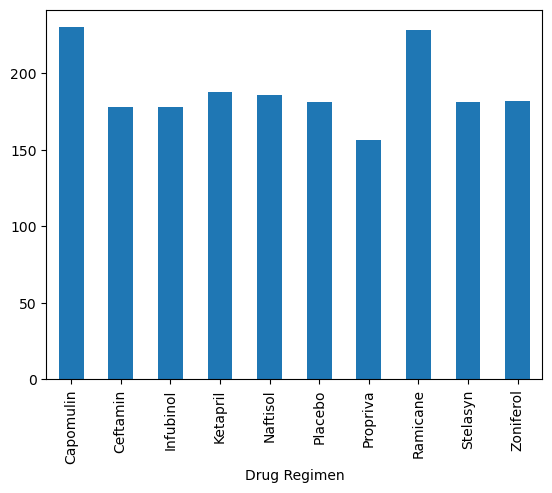

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_mouse_df.groupby('Drug Regimen').count()['Mouse ID'].plot(kind='bar')

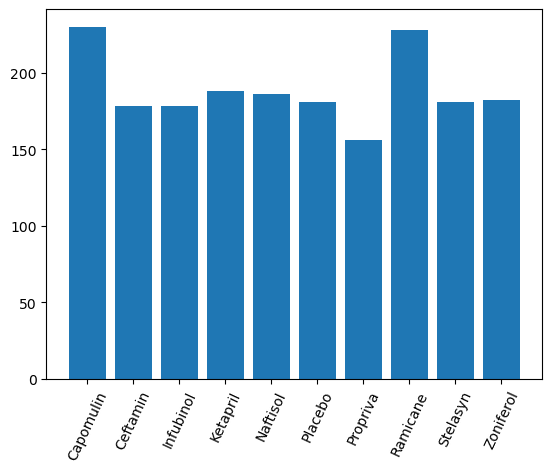

In [74]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(clean_mouse_df.groupby('Drug Regimen').count()['Mouse ID'].index,
        clean_mouse_df.groupby('Drug Regimen').count()['Mouse ID'])
plt.xticks(rotation=65)
plt.show()

<Axes: title={'center': 'Distribution of Female vs Male Mice'}, ylabel='count'>

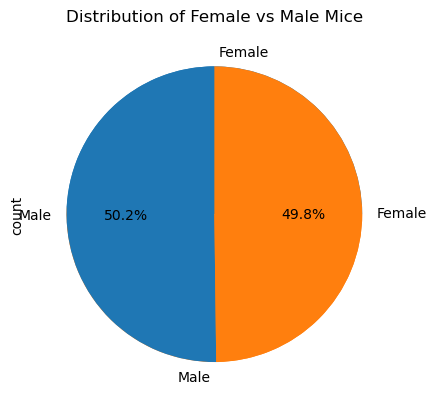

In [75]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
clean_mouse_df.groupby('Sex').count()['Mouse ID'].plot(kind='pie')
# Get the unique mice with their gender
unique_mice = clean_mouse_df[['Mouse ID', 'Sex']].drop_duplicates()

# Make the pie chart
unique_mice['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Distribution of Female vs Male Mice')

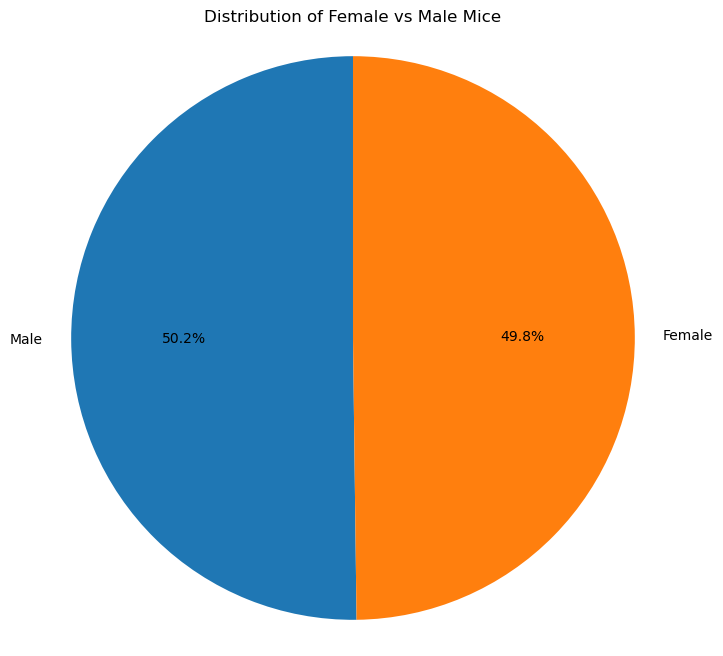

In [76]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_mouse_df[['Mouse ID', 'Sex']].drop_duplicates()
sex_counts = unique_mice['Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal') 

# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [80]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
cap_tumor_vol = clean_mouse_df[clean_mouse_df['Drug Regimen']=='Capomulin'].sort_values('Timepoint').iloc[-1]['Tumor Volume (mm3)']
cap_time_point = clean_mouse_df[clean_mouse_df['Drug Regimen']=='Capomulin'].sort_values('Timepoint').iloc[-1]['Timepoint']

ram_tumor_vol = clean_mouse_df[clean_mouse_df['Drug Regimen']=='Ramicane'].sort_values('Timepoint').iloc[-1]['Tumor Volume (mm3)']
ram_time_point = clean_mouse_df[clean_mouse_df['Drug Regimen']=='Ramicane'].sort_values('Timepoint').iloc[-1]['Timepoint']

inf_tumor_vol = clean_mouse_df[clean_mouse_df['Drug Regimen']=='Infubinol'].sort_values('Timepoint').iloc[-1]['Tumor Volume (mm3)']
inf_time_point = clean_mouse_df[clean_mouse_df['Drug Regimen']=='Infubinol'].sort_values('Timepoint').iloc[-1]['Timepoint']

cef_tumor_vol = clean_mouse_df[clean_mouse_df['Drug Regimen']=='Ceftamin'].sort_values('Timepoint').iloc[-1]['Tumor Volume (mm3)']
cef_time_point = clean_mouse_df[clean_mouse_df['Drug Regimen']=='Ceftamin'].sort_values('Timepoint').iloc[-1]['Timepoint']


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
vols = [cap_tumor_vol, ram_tumor_vol, inf_tumor_vol, cef_tumor_vol]
tps = [cap_time_point, ram_time_point, inf_time_point, cef_time_point]

dict_tumor = {'Tumor volume': vols, 'Timepoint': tps}
pd.DataFrame(dict_tumor, index=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])

,Tumor volume,Timepoint
Capomulin,37.074024,45
Ramicane,37.311236,45
Infubinol,62.754451,45
Ceftamin,64.729837,45


In [81]:
import numpy as np

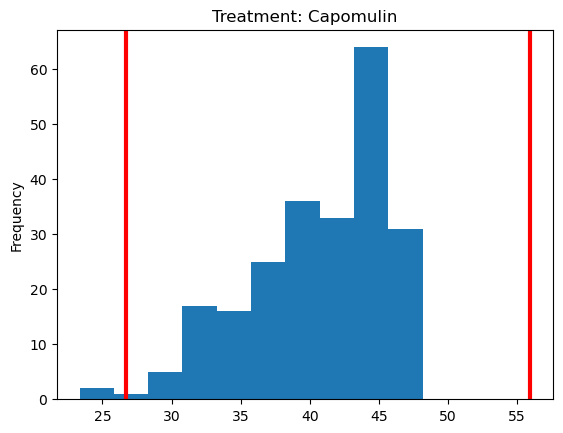

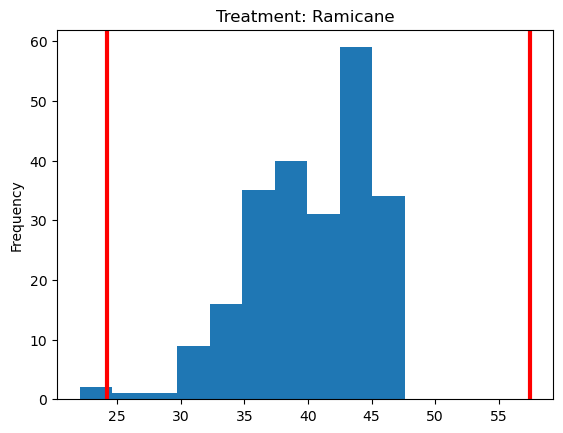

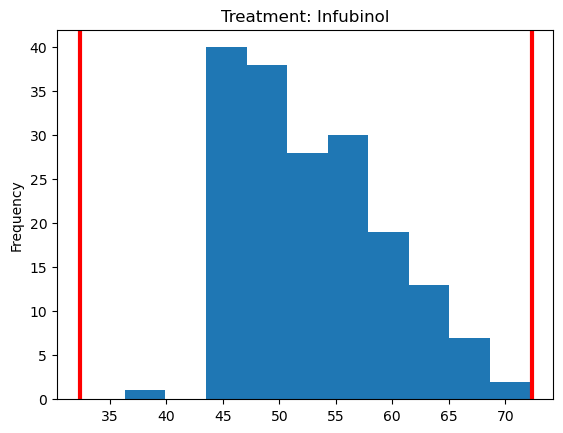

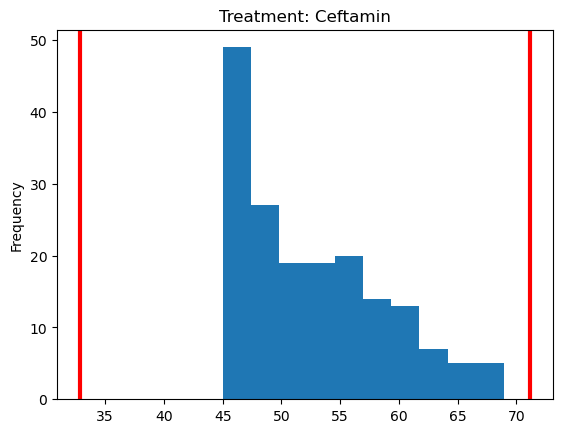

In [82]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for t in treatments:

# Locate the rows which contain mice on each drug and get the tumor volumes
    p25 = np.percentile(clean_mouse_df[clean_mouse_df['Drug Regimen']== t]['Tumor Volume (mm3)'], 25)
    p75= np.percentile(clean_mouse_df[clean_mouse_df['Drug Regimen']== t]['Tumor Volume (mm3)'], 75)

    iqr = p75 - p25

    # add subset


    # Determine outliers using upper and lower bounds
    clean_mouse_df[clean_mouse_df['Drug Regimen']== t]['Tumor Volume (mm3)'].plot.hist(title=f'Treatment: {t}')
    plt.axvline(p25 - 1.5*iqr, color='red', lw=3)
    plt.axvline(p75 + 1.5*iqr, color='red', lw=3)
    plt.show()

In [83]:
import seaborn as sns

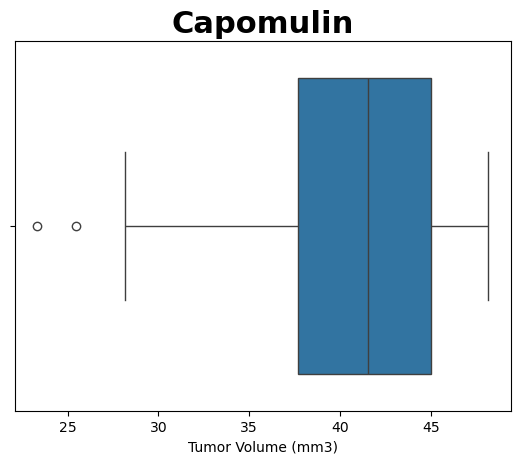

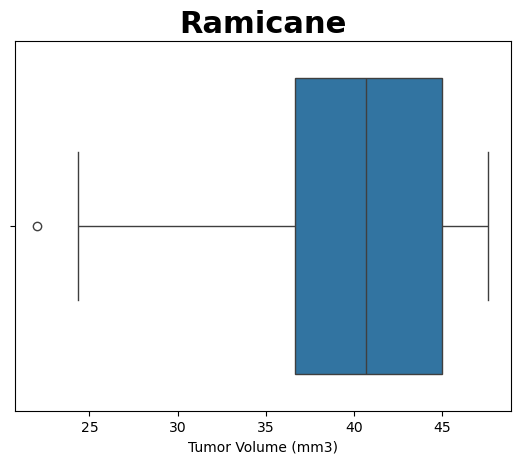

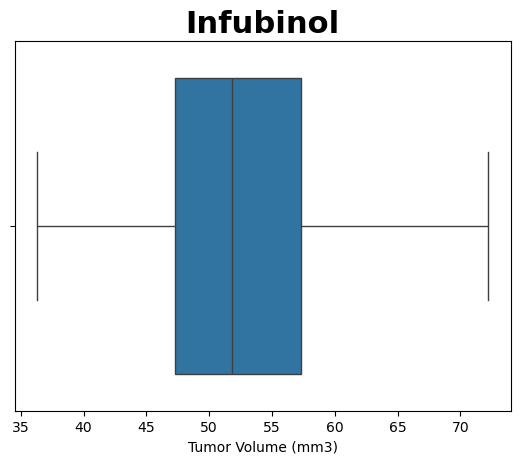

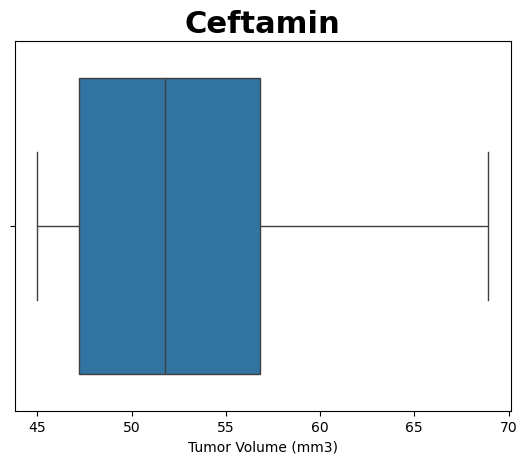

In [84]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
for t in treatments:
    sns.boxplot(data=clean_mouse_df[clean_mouse_df['Drug Regimen']== t], x='Tumor Volume (mm3)')
    plt.title(t, fontsize=22, fontweight='bold')
    plt.show()

## Line and Scatter Plots

In [85]:
clean_mouse_df[clean_mouse_df['Drug Regimen']== 'Capomulin']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


Text(0.5, 1.0, 'Tumor Volume for s185')

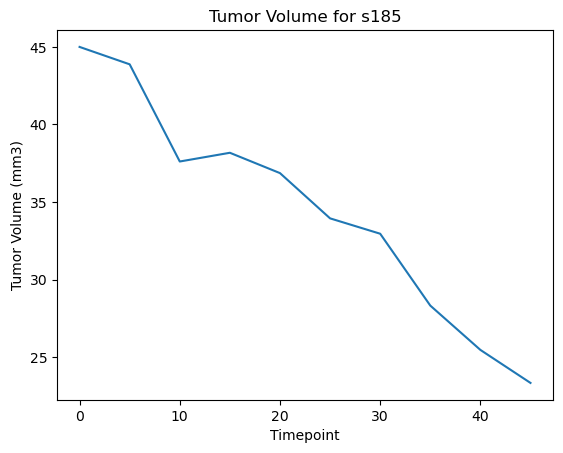

In [88]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
sns.lineplot(data=clean_mouse_df[(clean_mouse_df['Drug Regimen']=='Capomulin')&(clean_mouse_df['Mouse ID']=='s185')], x='Timepoint', y='Tumor Volume (mm3)')
plt.title('Tumor Volume for s185')

Text(0.5, 1.0, 'Weight by Tumor Volume for Capomulin')

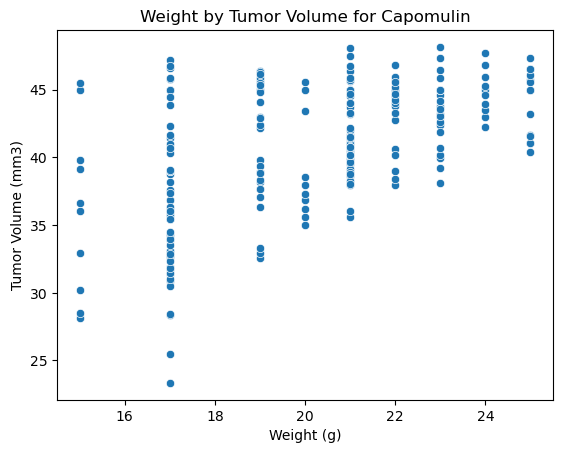

In [89]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
sns.scatterplot(data=clean_mouse_df[(clean_mouse_df['Drug Regimen']=='Capomulin')], x='Weight (g)', y='Tumor Volume (mm3)')
plt.title('Weight by Tumor Volume for Capomulin')

## Correlation and Regression

<Axes: >

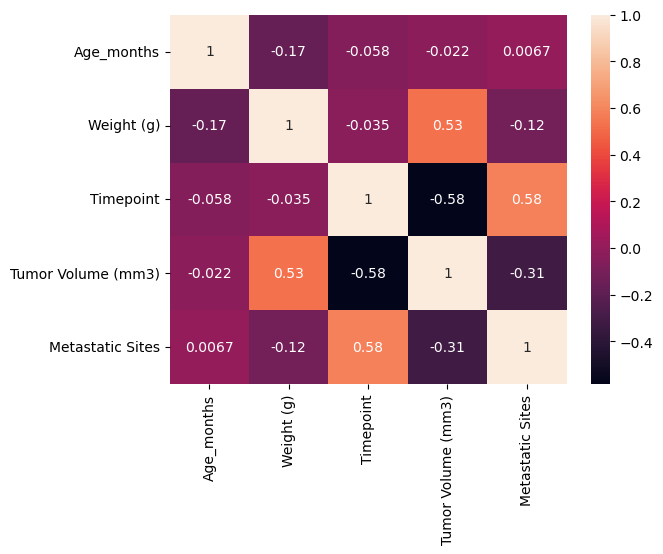

In [90]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

sns.heatmap(clean_mouse_df[clean_mouse_df['Drug Regimen']=='Capomulin'].corr(numeric_only=True), annot=True)


<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

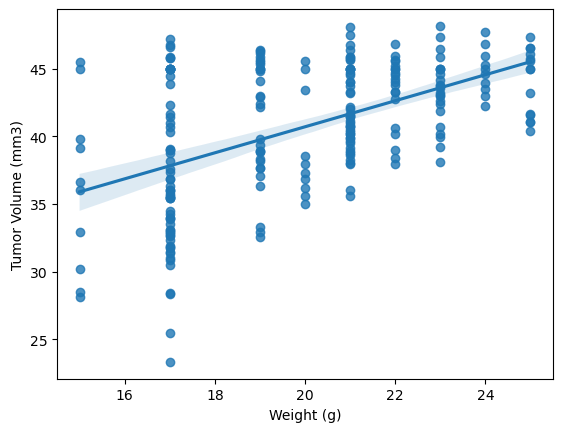

In [91]:
sns.regplot(data=clean_mouse_df[(clean_mouse_df['Drug Regimen']=='Capomulin')], x='Weight (g)', y='Tumor Volume (mm3)')